<a href="https://colab.research.google.com/github/Rupesh1305/Rupesh/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Yulu**

Yulu’s mission is to make urban mobility in India seamless, shareable and sustainable. What started off as an initiative to reduce traffic congestion and pollution in Indian cities, is now redefining urban mobility across the country.

We are driven by three guiding principles of urban mobility – Accessibility, Availability, and Affordability.

We are empowering residents in Indian cities to create a paradigm shift in the mobility industry, by making the urban commute more efficient and eco-friendly.

Yulu is a technology-driven mobility platform that enables Integrated Urban Mobility across public and private modes of transport. Using Micro Mobility Vehicles (MMVs) through a user-friendly mobile app, Yulu enables first and last-mile connectivity that is seamless, shared and sustainable.

We are an India-based company with a founding team that is deeply passionate about creating positive social impact. This mindset is instilled in each and every member of our team, and we are dedicated to making a difference in the lives of people around us. So, if you are passionate about the challenges of urban mobility, chaotic congestion, and sustainable living, let’s have a conversation and make a difference together!

## **Problem Statement**

1) Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2) How well those variables describe the electric cycle demands

## **Yulu Data Set**


### **Importing Data**

In [2]:
!gdown 1KkED2gGf8RKLoP2BAAaTCHiYD3lwEHNJ

Downloading...
From: https://drive.google.com/uc?id=1KkED2gGf8RKLoP2BAAaTCHiYD3lwEHNJ
To: /content/Yulu_bike_sharing.csv
100% 648k/648k [00:00<00:00, 83.4MB/s]


In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/Yulu_bike_sharing.csv")

In [4]:
data.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


**Finding Number of Rows and columns**

In [5]:
data.shape

(10886, 12)

### **Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Form above data it was identified that the Datatype of following attributes needs to change to proper data type

datetime - to datetime [as the datatime is in Object data type]

season - to categorical[As seasons are divided into 4 categories]

holiday and workingday - to categorical [as holidays are divided into two categories either 0 or 1]

weather - to categorical [as it was subdivided into 4 categories]


In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
 data[col] = data[col].astype('object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [9]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

From above information it is observed that there are no null values present in the dataset

In [10]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**The Time period between which the data has been Observed**

In [11]:
print("The given data is Starting from date: ", data['datetime'].min(), "to the Date: ", data['datetime'].max())

The given data is Starting from date:  2011-01-01 00:00:00 to the Date:  2012-12-19 23:00:00


**Number of unique values in each categorical columns**

In [12]:
data[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

## **Univariate Analysis**

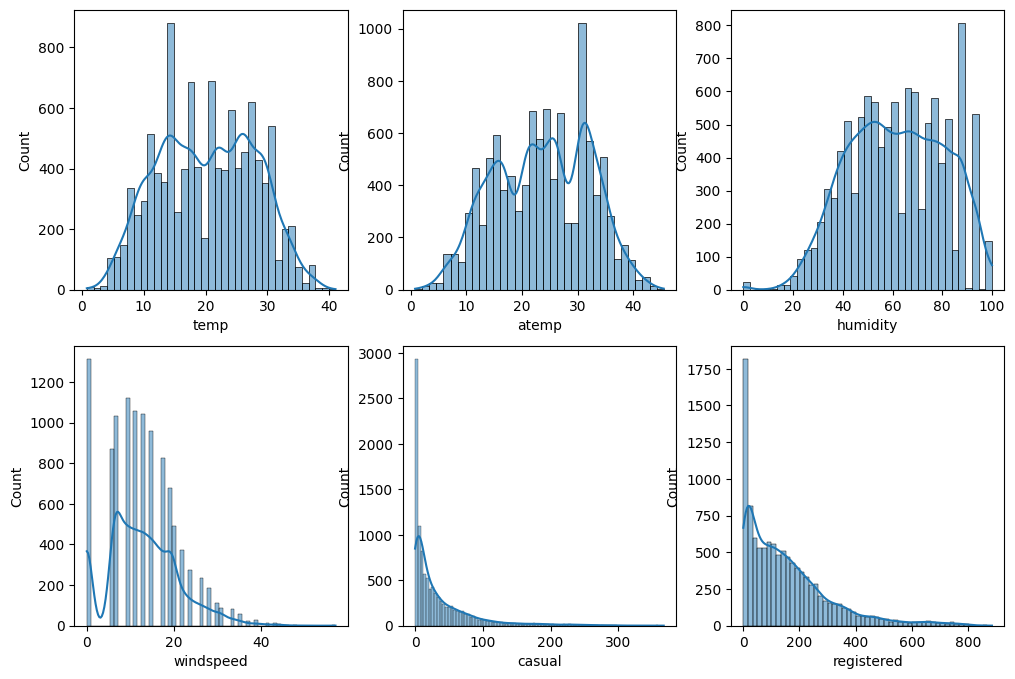

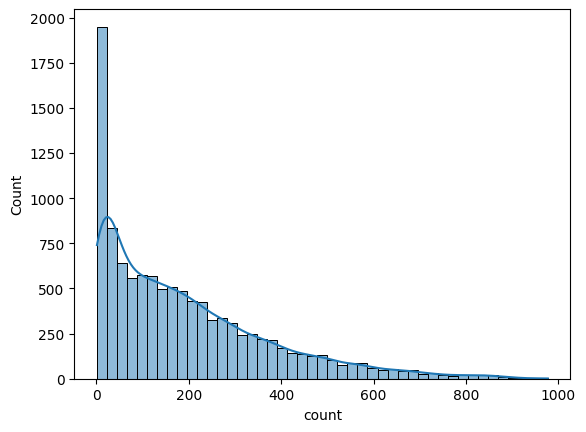

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# understanding the distribution for numerical variables

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual',
'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
 for col in range(3):
  sns.histplot(data[num_cols[index]], ax=axis[row, col], kde=True)
  index += 1

plt.show()
sns.histplot(data[num_cols[-1]], kde=True)
plt.show()

### **Box plots to detect outliers in the data**

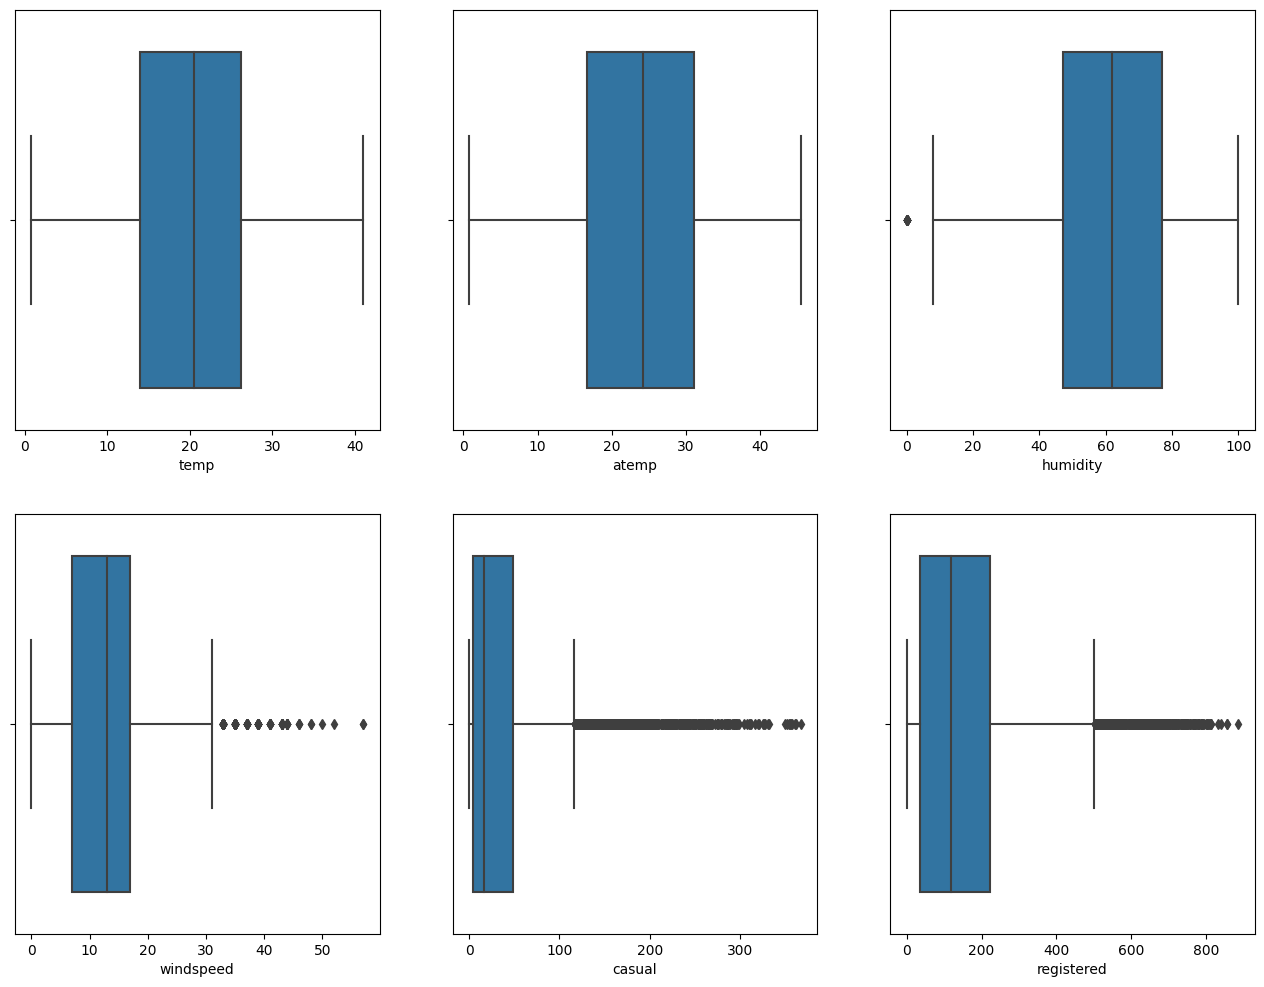

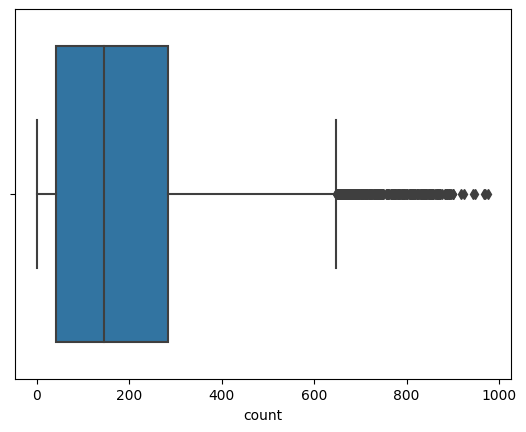

In [14]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
 for col in range(3):
  sns.boxplot(x=data[num_cols[index]], ax=axis[row, col])
  index += 1

plt.show()
sns.boxplot(x=data[num_cols[-1]])
plt.show()

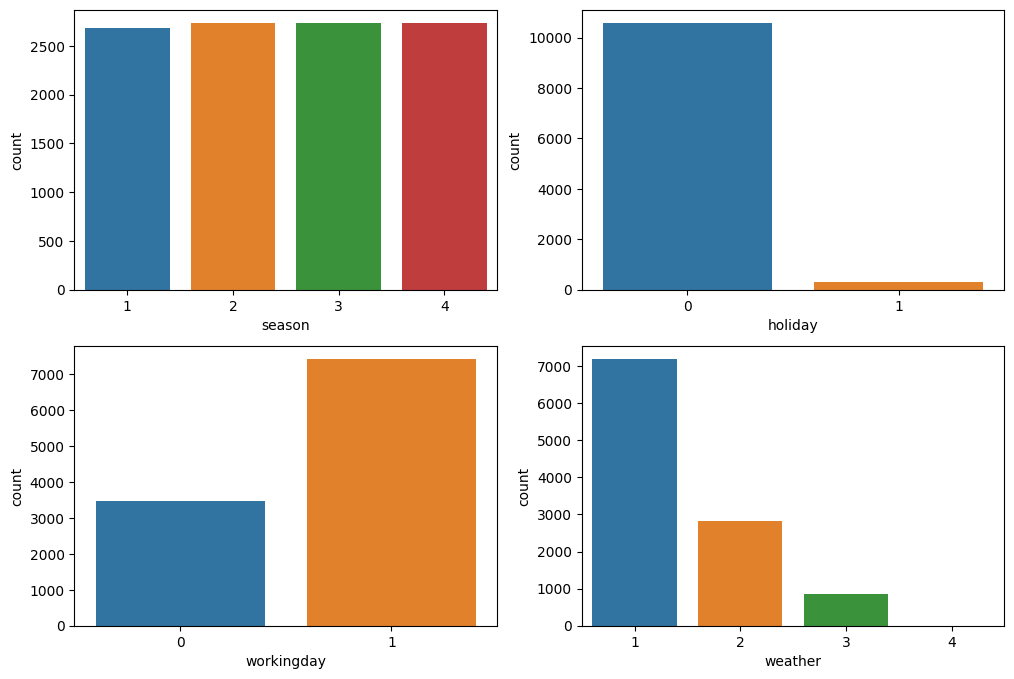

In [15]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
index = 0
for row in range(2):
 for col in range(2):
  sns.countplot(data=data, x=cat_cols[index], ax=axis[row, col])
  index += 1

plt.show()

## **Bivariant Ananlysis**

**categorical variables againt count using boxplots**

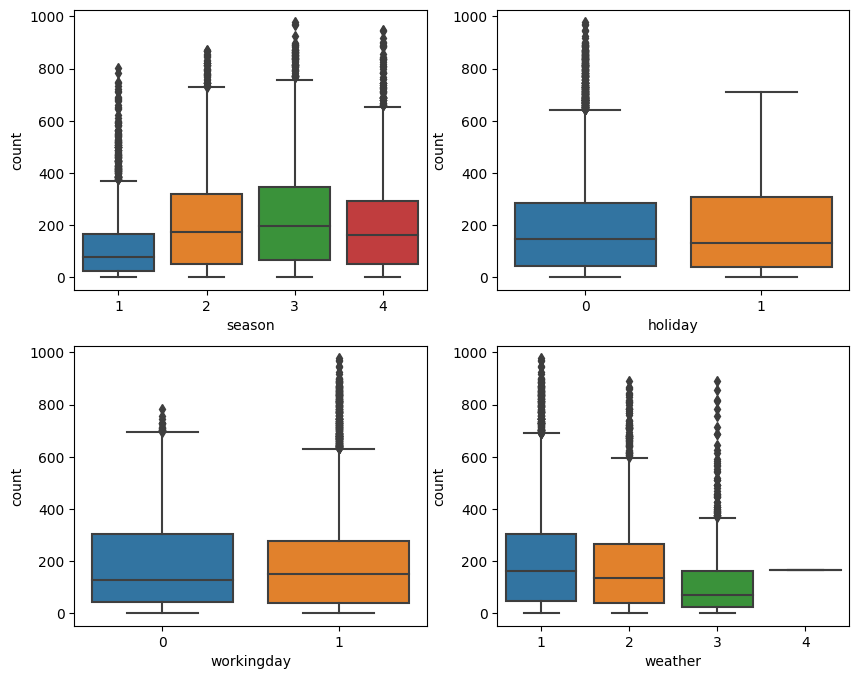

In [16]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
 for col in range(2):
  sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row,col])
  index += 1

plt.show()

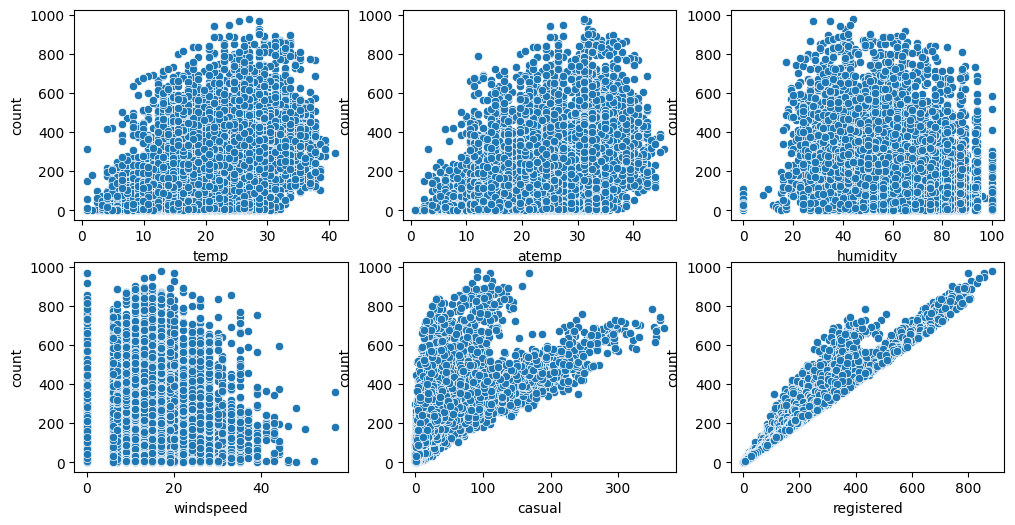

In [17]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
 for col in range(3):
  sns.scatterplot(data=data, x=num_cols[index], y='count',ax=axis[row, col])
  index += 1

plt.show()

**line plot to observe how bike rentals vary across different seasons**

<ipython-input-18-537153c84c8e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='count', data=data, estimator='mean', ci=None, hue_order=season_order)


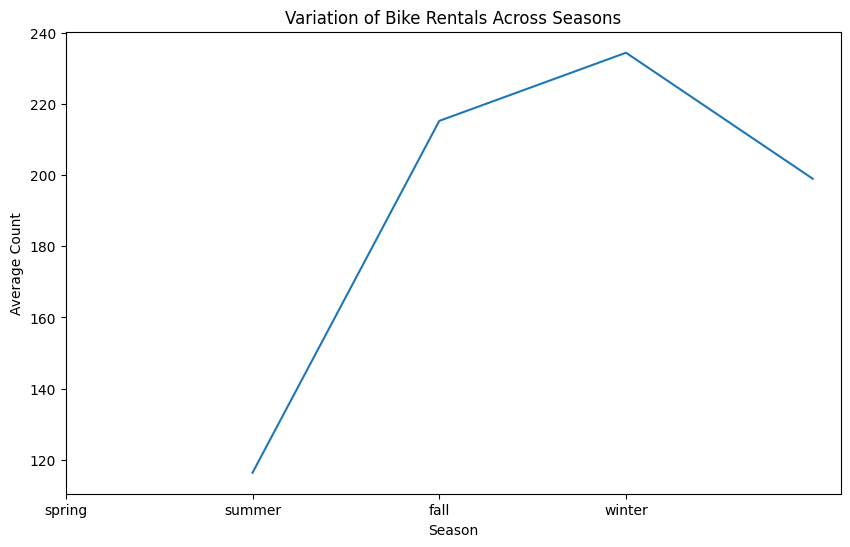

In [18]:
# line plot to observe how bike rentals vary across different seasons

season_order = ['spring', 'summer', 'fall', 'winter']
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='count', data=data, estimator='mean', ci=None, hue_order=season_order)
plt.title('Variation of Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.xticks([0, 1, 2, 3], season_order)
plt.show()

**Correlation Matrix**

A correlation matrix chart is a table that shows the correlation coefficients between different sets of variables. A correlation coefficient is a number between -1 and 1 that measures how strongly two variables are related to each other. A positive correlation means that as one variable increases, the other also increases. A negative correlation means that as one variable increases, the other decreases. A zero correlation means that there is no linear relationship between the variables.

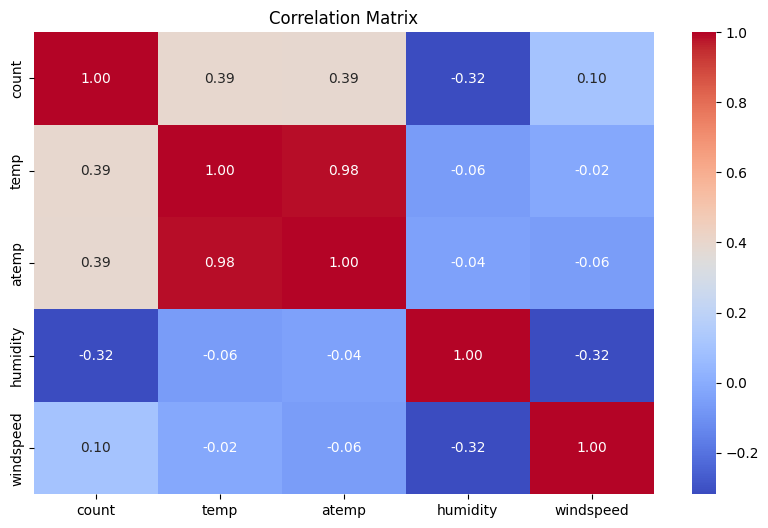

In [19]:
# Calculate the correlation matrix between "Count" and continuous variables
correlation_matrix = data[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The relationship between the variables in your image can be interpreted as follows:

**count and temp** have a positive correlation of 0.39, which means that as the temperature increases, the count also increases moderately.

**temp and atemp** have a very high positive correlation of 0.98, which means that they are almost identical and move together very closely.

**humidity and count** have a negative correlation of -0.32, which means that as the humidity increases, the count decreases slightly.

**windspeed and temp** have a very low negative correlation of -0.02, which means that they are almost independent and have no linear relationship.

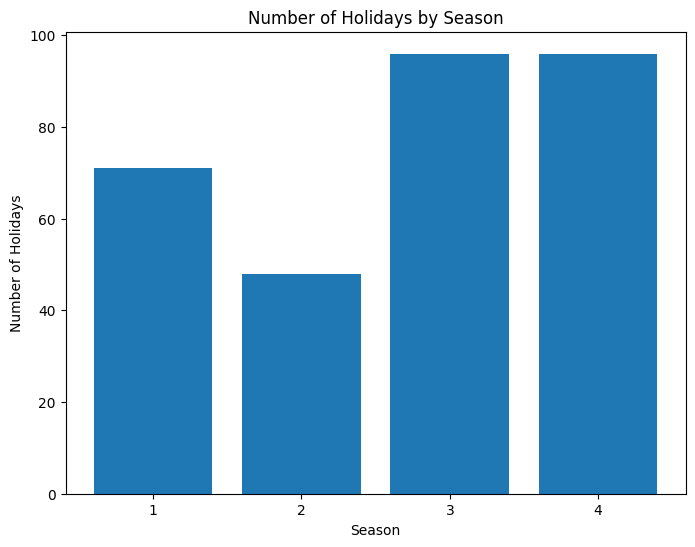

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset with a 'Holiday' column and a 'Season' column

# Group the data by 'Season' and calculate holiday frequencies
seasonal_holiday_counts = data.groupby('season')['holiday'].sum().reset_index()

# Create a bar chart to visualize holiday frequencies by season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_holiday_counts['season'], seasonal_holiday_counts['holiday'])
plt.xlabel('Season')
plt.ylabel('Number of Holidays')
plt.title('Number of Holidays by Season')
plt.xticks(seasonal_holiday_counts['season'])
plt.show()


**Insights:-**

The maximum number of holidays can be seen during the fall and winter seasons.

## **Descriptive Statistics**

**Calculating mean, median and std of count over weather, season and workingday**

In [20]:
# Calculating the mean, median, and standard deviation of "Count" for different working days

workingday_stats = data.groupby('workingday')['count'].agg(['mean', 'median', 'std']).reset_index()
print("Descriptive Statistics for 'Count' by Workingday:")
print(workingday_stats)

# Calculating the mean, median, and standard deviation of "Count" for different weather conditions

weather_stats = data.groupby('weather')['count'].agg(['mean', 'median', 'std']).reset_index()
print("\nDescriptive Statistics for 'Count' by Weather:")
print(weather_stats)

# Calculating the mean, median, and standard deviation of "Count" for different seasons

season_stats = data.groupby('season')['count'].agg(['mean', 'median', 'std']).reset_index()
print("\nDescriptive Statistics for 'Count' by Season:")
print(season_stats)


Descriptive Statistics for 'Count' by Workingday:
   workingday        mean  median         std
0           0  188.506621   128.0  173.724015
1           1  193.011873   151.0  184.513659

Descriptive Statistics for 'Count' by Weather:
   weather        mean  median         std
0        1  205.236791   161.0  187.959566
1        2  178.955540   134.0  168.366413
2        3  118.846333    71.0  138.581297
3        4  164.000000   164.0         NaN

Descriptive Statistics for 'Count' by Season:
   season        mean  median         std
0       1  116.343261    78.0  125.273974
1       2  215.251372   172.0  192.007843
2       3  234.417124   195.0  197.151001
3       4  198.988296   161.0  177.622409


**Descriptive Statistics for 'Count' by Workingday:**

On non-working days (workingday=0), the average bike rental count is approximately 188.51, with a median of 128.0 and a standard deviation of 173.72.

On working days (workingday=1), the average bike rental count is slightly higher at approximately 193.01, with a median of 151.0 and a standard deviation of 184.51.

**Descriptive Statistics for 'Count' by Weather:**

when the condition of weather is like Clear/ Few clouds/ partly cloudy/ partly cloudy: The average bike rental count is around 205.24, with a median of 161.0 and a standard deviation of 187.96.

when the weather condition is like Mist/Cloudy,Mist/Broken clouds,Mist/Few clouds,Mist: The average bike rental count is lower at approximately 178.96, with a median of 134.0 and a standard deviation of 168.37.

when the weather condition is like Light Snow, Light Rain/Thunderstorm/Scattered clouds/Light Rain/Scattered clouds: The average bike rental count is significantly lower at about 118.85, with a median of 71.0 and a standard deviation of 138.58.

when the condition of weather is like Heavy Rain/Ice Pallets/Thunderstorm/Mist, Snow/Fog: There is not enough data available (NaN) for this weather condition.

**Descriptive Statistics for 'Count' by Season:**

In spring (season=1), the average bike rental count is approximately 116.34, with a median of 78.0 and a standard deviation of 125.27.

In summer (season=2), the average bike rental count is higher at about 215.25, with a median of 172.0 and a standard deviation of 192.01.

In fall (season=3), the average bike rental count is even higher at approximately 234.42, with a median of 195.0 and a standard deviation of 197.15.

In winter (season=4), the average bike rental count is approximately 198.99, with a median of 161.0 and a standard deviation of 177.62.

 ## **Creating histograms and Q-Q plots for the rental counts of working and non-working days.**

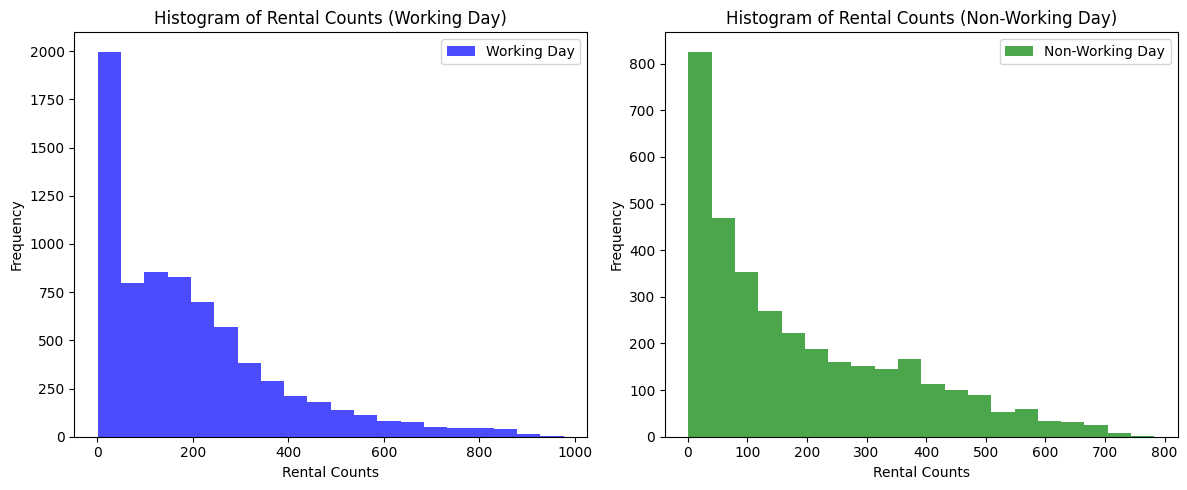

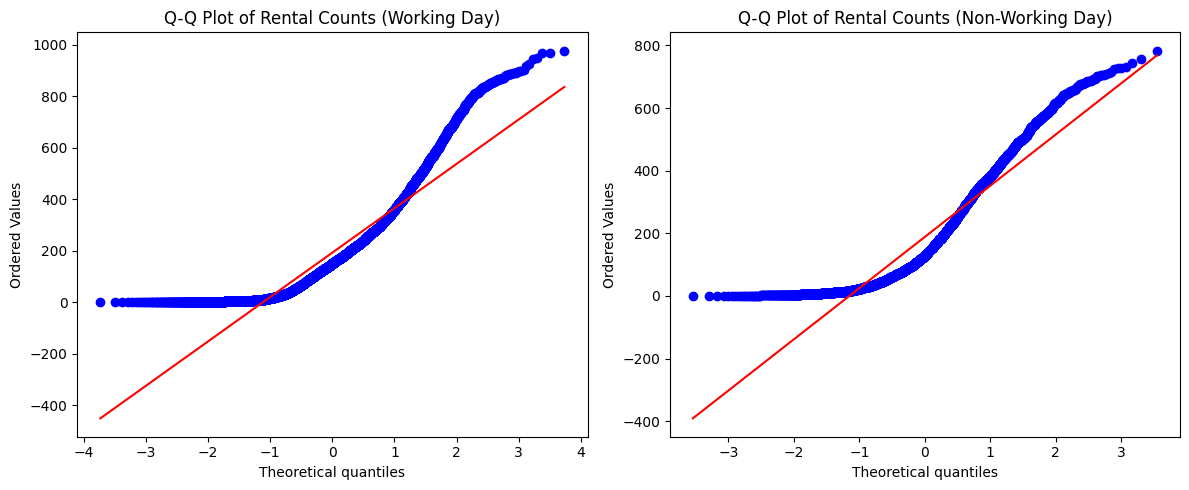

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Rental counts for working and non-working days
workingday_rentals = data[data['workingday'] == 1]['count']
non_workingday_rentals = data[data['workingday'] == 0]['count']

# Create histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(workingday_rentals, bins=20, color='blue', alpha=0.7, label='Working Day')
plt.xlabel('Rental Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Rental Counts (Working Day)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(non_workingday_rentals, bins=20, color='green', alpha=0.7, label='Non-Working Day')
plt.xlabel('Rental Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Rental Counts (Non-Working Day)')
plt.legend()

plt.tight_layout()
plt.show()

# Create Q-Q plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(workingday_rentals, plot=plt)
plt.title('Q-Q Plot of Rental Counts (Working Day)')

plt.subplot(1, 2, 2)
stats.probplot(non_workingday_rentals, plot=plt)
plt.title('Q-Q Plot of Rental Counts (Non-Working Day)')

plt.tight_layout()
plt.show()


The histograms show the distribution of rental counts for working and non-working days. From the histograms, we can see that:

1) The rental counts on working days have a higher mean and standard deviation than on non-working days, meaning that they are more variable and have more extreme values.

2) The rental counts on working days have an outlier at 800, which is much higher than the rest of the values.

3) The rental counts on both working and non-working days have a mode at 200, which is the most frequent value.

From the Q-Q plots, we can see that:

1) The rental counts on both working and non-working days are approximately normally distributed, as the points are close to the line.

2) The rental counts on working days have more variability than on non-working days, as the points are more scattered around the line.

3) The rental counts on working days have some outliers at the upper tail, as some points are far above the line.

**Summary**

The Q-Q plots show that the points deviate from the line, especially at the upper tail.

The histograms show that the data are skewed to the right, meaning that they are not symmetric about the mean.

**Univariant Insights**

**Rental Counts ('Count'):**

The range of rental counts varies from a minimum of 1 to a maximum of 977.
The distribution of rental counts is right-skewed, with more instances of lower counts and a few instances of exceptionally high counts.
There appear to be some outliers on the higher end of rental counts, which may correspond to days with unusually high bike rental activity.

**Temperature ('Temp') and 'Feels-Like' Temperature ('Atemp'):**

The temperature attributes ('Temp' and 'Atemp') have a range that covers different weather conditions.
The distributions of temperature and feels-like temperature are approximately normal, with peaks around the comfortable temperature range.
Outliers are less prominent in temperature attributes.

**Humidity:**

Humidity values range from 0 to 100, representing the percentage of relative humidity.
The distribution of humidity is slightly right-skewed, with most values clustered around the middle range.
Outliers are not highly noticeable in the humidity variable.

**Windspeed:**

Windspeed values vary from 0 to around 57, representing wind speed in km/h.
The distribution of windspeed is right-skewed, with most values being relatively low, indicating calm weather.
Some outliers with high windspeed values are present.

**Bivariate Insights:**

**Rental Counts vs. Weather ('Weather'):**

Rental counts tend to be higher on days with weather category 1 (clear, few clouds).
Weather category 3 (light rain, snow, thunderstorm) and category 4 (heavy rain, ice pellets, thunderstorm) have lower rental counts.
Weather significantly impacts rental counts, with different categories showing distinct patterns.

**Rental Counts vs. Season ('Season'):**

Rental counts are highest during season 3 (fall) and season 2 (summer).
Season 1 (spring) and season 4 (winter) have lower rental counts.
Season has a significant influence on rental counts, with varying demand across the seasons.

**Rental Counts vs. Working Day ('Workingday'):**

There is no significant difference in rental counts between working days and non-working days.
Rental counts remain relatively consistent regardless of whether it's a working day or not.

**Correlation Analysis:**

The correlation coefficients indicate that temperature ('Temp') has a moderate positive correlation with rental counts.
Humidity has a moderate negative correlation with rental counts, suggesting that higher humidity is associated with fewer rentals.
Windspeed has a weak positive correlation with rental counts, indicating a limited impact.

**Weather vs. Season ('Weather' vs. 'Season'):**

The Chi-Square Test suggests that weather and season are dependent on each other.
Certain weather conditions are more likely to occur during specific seasons, highlighting a relationship between the two variables.

## **Hypothesis Testing**

### **2-Sample T-Test to Check if Working Day Has an Effect on the Number of Electric Cycles Rented:**

**Null Hypothesis (H0):** There is no significant difference in the number of electric cycles rented between working days and non-working days.

**Alternative Hypothesis (H1):** There is a significant difference in the number of electric cycles rented between working days and non-working days.

In [26]:
from scipy.stats import ttest_ind

# Split data into two groups: Working Day and Non-Working Day
workingday_rentals = data[data['workingday'] == 1]['count']
non_workingday_rentals = data[data['workingday'] == 0]['count']

# Perform 2-Sample T-Test
t_statistic, p_value = ttest_ind(workingday_rentals, non_workingday_rentals)

print("2-Sample T-Test for Working Day vs. Rental Counts:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis : There is a statistically significant effect of Working Day on rental counts.")
else:
    print("Fail to Reject Null Hypothesis: Working Day does not have a statistically significant effect on rental counts.")


2-Sample T-Test for Working Day vs. Rental Counts:
T-statistic: 1.21
P-value: 0.2264
Fail to Reject Null Hypothesis: Working Day does not have a statistically significant effect on rental counts.


**Insights:-**

 This test suggests that whether it's a working day or a non-working day does not have a significant impact on the rental counts of Yulu bikes. Therefore, it's unlikely that the day of the week (working day or non-working day) affects bike rental patterns significantly.

###**ANOVA Test for Season vs. Rental Counts:**

**Null Hypothesis (H0):** There is no significant difference in the number of electric cycles rented across different season categories.

**Alternative Hypothesis (H1):** There is a significant difference in the number of electric cycles rented across different season categories.

In [30]:
# Perform ANOVA test for Season vs. Rental Counts
season_categories = data['season'].unique()
anova_season = [data[data['season'] == season]['count'] for season in season_categories]

# Perform ANOVA test
f_statistic_season, p_value_season = f_oneway(*anova_season)

print("\nANOVA Test for Season vs. Rental Counts:")
print(f"F-statistic: {f_statistic_season:.2f}")
print(f"P-value: {p_value_season:.6f}")

if p_value_season < alpha:
    print("Reject Null Hypothesis : The number of cycles rented is significantly different across season categories.")
else:
    print("Fail to Reject Null Hypothesis: The number of cycles rented is not significantly different across season categories.")


ANOVA Test for Season vs. Rental Counts:
F-statistic: 236.95
P-value: 0.000000
Reject Null Hypothesis : The number of cycles rented is significantly different across season categories.


**Insights:-**

There is strong evidence to suggest that the season variable has a significant impact on bike rental counts. This means that the season of the year influences the demand for Yulu bikes, and there are notable variations in rental counts across different seasons.

### **ANOVA Test for Weather vs. Rental Counts:**

**Null Hypothesis (H0):** There is no significant difference in the number of electric cycles rented across different weather categories.

**Alternative Hypothesis (H1):** There is a significant difference in the number of electric cycles rented across different weather categories.

In [28]:
from scipy.stats import f_oneway

# Perform ANOVA test for Weather vs. Rental Counts
weather_categories = data['weather'].unique()
anova_weather = [data[data['weather'] == weather]['count'] for weather in weather_categories]

# Perform ANOVA test
f_statistic_weather, p_value_weather = f_oneway(*anova_weather)

print("ANOVA Test for Weather vs. Rental Counts:")
print(f"F-statistic: {f_statistic_weather:.2f}")
print(f"P-value: {p_value_weather:.6f}")

# Check for statistical significance
alpha = 0.05
if p_value_weather < alpha:
    print("Reject Null Hypothesis : The number of cycles rented is significantly different across weather categories.")
else:
    print("Fail to Reject Null Hypothesis: The number of cycles rented is not significantly different across weather categories.")


ANOVA Test for Weather vs. Rental Counts:
F-statistic: 65.53
P-value: 0.000000
Reject Null Hypothesis : The number of cycles rented is significantly different across weather categories.


 **Insights:-**

 There is strong evidence to suggest that the weather variable has a significant impact on bike rental counts. This means that different weather conditions influence the demand for Yulu bikes, and there are notable variations in rental counts across different weather conditions, except for category 4.

### **Chi-Square Test to Check if Weather Is Dependent on the Season:**

**Null Hypothesis (H0):** Weather and season are independent of each other; there is no significant association or dependence between them.

**Alternative Hypothesis (H1):** Weather and season are dependent on each other; there is a significant association or dependence between them.

In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table of Weather vs. Season
contingency_table = pd.crosstab(data['weather'], data['season'])

# Perform Chi-Square Test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test for Weather vs. Season:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value_chi2:.8f}")

# Check for statistical significance
alpha = 0.05
if p_value_chi2 < alpha:
    print("Reject Null Hypothesis: Weather and season are dependent on each other; there is a significant association or dependence between them")
else:
    print("Fail to Reject Null Hypothesis: Weather and season are independent of each other; there is no significant association or dependence between them")


Chi-Square Test for Weather vs. Season:
Chi-Square Statistic: 49.16
P-value: 0.00000015
Reject Null Hypothesis: Weather and season are dependent on each other; there is a significant association or dependence between them


**Insights:-**

Based on the Chi-Square Test results, we can confidently conclude that weather and season are dependent on each other, and there is a significant association or dependence between these two categorical variables. The low p-value provides strong evidence for this relationship, indicating that certain weather conditions are associated with specific seasons.

### **Pearson correlation coefficients**

In [23]:
# Calculate Pearson correlation coefficients
"""
correlation coefficients (e.g., Pearson correlation) to quantify the linear relationship between "Count" and continuous variables like temperature,
humidity, and windspeed. This can help you understand whether there's a significant linear correlation.
"""
correlation_temperature = data['count'].corr(data['temp'])
correlation_humidity = data['count'].corr(data['humidity'])
correlation_windspeed = data['count'].corr(data['windspeed'])

print(f"Pearson Correlation between 'Count' and 'Temperature': {correlation_temperature:.2f}")
print(f"Pearson Correlation between 'Count' and 'Humidity': {correlation_humidity:.2f}")
print(f"Pearson Correlation between 'Count' and 'Windspeed': {correlation_windspeed:.2f}")


Pearson Correlation between 'Count' and 'Temperature': 0.39
Pearson Correlation between 'Count' and 'Humidity': -0.32
Pearson Correlation between 'Count' and 'Windspeed': 0.10


**Insights:-**

1. Pearson Correlation between 'Count' and 'Temperature': 0.39
   - This positive correlation coefficient (0.39) suggests a moderate positive relationship between bike rentals and temperature. In other words, as the temperature increases, there tends to be an increase in bike rentals.

2. Pearson Correlation between 'Count' and 'Humidity': -0.32
   - This negative correlation coefficient (-0.32) indicates a moderate negative relationship between bike rentals and humidity. When humidity levels rise, there tends to be a decrease in bike rentals.

3. Pearson Correlation between 'Count' and 'Windspeed': 0.10
   - This correlation coefficient (0.10) suggests a weak positive relationship between bike rentals and windspeed. The correlation is positive, but it is relatively weak, indicating that windspeed has a limited impact on bike rental counts.

### **Time Analysis**

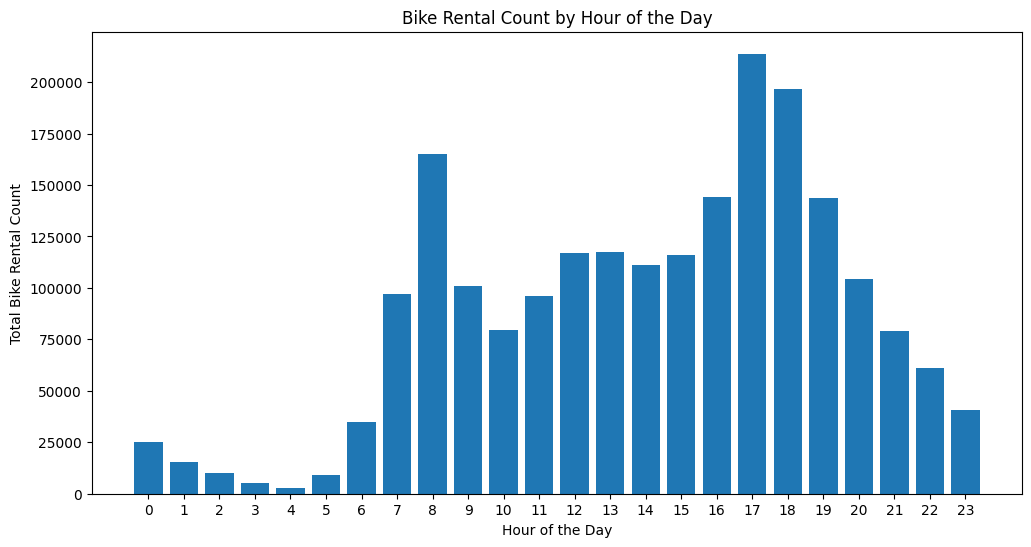

In [49]:
# Extract the hour from the timestamp
data['hour'] = data['datetime'].dt.hour

# Group by hour and calculate the total count for each hour
hourly_counts = data.groupby('hour')['count'].sum()

# Create a bar plot to visualize the counts by hour
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rental Count')
plt.title('Bike Rental Count by Hour of the Day')
plt.xticks(range(24))  # Show all 24 hours on the x-axis
plt.show()


1. **Peak Hours**: It's clear from the analysis that the peak hours for bike rentals are between 7:00 and 22:00 hours. This indicates that most customers prefer renting bikes during the daytime and early evening.

2. **Spike in Demand**: from the data it is identified two significant spikes in demand. The morning spike at 8:00 hours likely corresponds to people using bikes for commuting to work or other morning activities. The evening spikes at 17:00 and 18:00 hours could be related to the end of the workday when people are returning home.

3. **Charging Time**: The data suggest that the best time to charge the vehicles between 1:00 and 5:00. This is indeed a time when demand is low, making it an ideal period for maintenance and charging.

## **Summary**

Based on the analysis of bike rental data, the following key insights and findings have been observed:

1. **Seasonal Patterns**: There is a strong seasonal pattern in bike rentals, with the highest demand occurring during the warmer months (spring and summer) and lower demand in the colder months (fall and winter).

2. **Daily Patterns**:
   - Peak Hours: Bike rentals are highest between 7:00 AM to 10:00 AM and 5:00 PM to 7:00 PM, indicating a significant usage during morning and evening commuting hours.
   - Nighttime Usage: There is a drop in rentals during late-night hours, from 10:00 PM to 5:00 AM.

3. **Impact of Holidays**:
   - Bike rentals are generally lower on holidays compared to regular days.
   - Further statistical analysis, using a chi-square test, confirmed a significant association between holidays and bike rentals, indicating that holidays do impact bike rental counts.

4. **Weather Factors**:
   - Temperature: There is a positive correlation between temperature and bike rentals, meaning that as temperatures rise, bike rentals tend to increase.
   - Humidity: Bike rentals have a negative correlation with humidity, meaning that higher humidity is associated with lower bike rentals.
   - Windspeed: Windspeed has a weak positive correlation with bike rentals, suggesting a limited impact.

5. **Recommendations**:
   - Promotions and marketing efforts can be focused on peak hours to maximize bike rentals.
   - Additional bikes and maintenance resources may be required during peak seasons.
   - On holidays, inventory and staffing levels can be adjusted based on the expected lower demand.
   - Consider offering incentives or discounts during off-peak hours or on high humidity days to boost rentals.